# (7주차) 4월18일
> numpy (메소드 도움말확인, hstack, vstack, append, ravel, flatten, 기타통계함수들, dtype, 브로드캐스팅), matploblib (plt.pyplot, plt.hist) 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-wAL4hb03IaheCSUSvgt-Us



`-` (1/5) 메소드 도움말확인, hstack, vstack, append, ravel, flatten, 기타통계함수들, dtype, 브로드캐스팅

`-` (2/5) 브로드캐스팅 

`-` (3/5) matplotlib 

`-` (4/5) 시험유의사항

`-` (5/5) 예상문제 및 학점 안내사항 

### imports

In [103]:
import numpy as np

### numpy 공부 7단계 

#### note 1: 메소드 도움말 확인하기 

`-` 파이썬에서 함수를 적용하는 2가지 방식
- np.sum(a)
- a.sum() 

In [104]:
a=np.array([1,2,3,4,5])
a

array([1, 2, 3, 4, 5])

In [105]:
a.sum()

15

In [106]:
np.sum(a)

15

`-` 넘파이에서 `a.sum()`에 대한 도움말은 보통 `np.sum()`에 자세히 나와있음. $\to$ `np.sum()`의 도움말을 확인하고 `np.sum(a)`와 `a.sum()`이 동일함을 이용하여 `a.sum()`의 사용법을 미루어 유추해야함. 

In [107]:
a.sum?

Docstring:
a.sum(axis=None, dtype=None, out=None, keepdims=False, initial=0, where=True)

Return the sum of the array elements over the given axis.

Refer to `numpy.sum` for full documentation.

See Also
--------
numpy.sum : equivalent function
Type:      builtin_function_or_method


In [108]:
np.sum?

Signature:
np.sum(
    a,
    axis=None,
    dtype=None,
    out=None,
    keepdims=<no value>,
    initial=<no value>,
    where=<no value>,
)
Docstring:
Sum of array elements over a given axis.

Parameters
----------
a : array_like
    Elements to sum.
axis : None or int or tuple of ints, optional
    Axis or axes along which a sum is performed.  The default,
    axis=None, will sum all of the elements of the input array.  If
    axis is negative it counts from the last to the first axis.

    .. versionadded:: 1.7.0

    If axis is a tuple of ints, a sum is performed on all of the axes
    specified in the tuple instead of a single axis or all the axes as
    before.
dtype : dtype, optional
    The type of the returned array and of the accumulator in which the
    elements are summed.  The dtype of `a` is used by default unless `a`
    has an integer dtype of less precision than the default platform
    integer.  In that case, if `a` is signed then the platform integer
    is used w

#### note 2: hstack, vstack 

`-` hstack, vstack 를 쓰는 사람도 있다. 

In [109]:
a=np.arange(6) 
b=-a 

In [110]:
np.vstack([a,b])

array([[ 0,  1,  2,  3,  4,  5],
       [ 0, -1, -2, -3, -4, -5]])

In [111]:
np.stack([a,b],axis=0)

array([[ 0,  1,  2,  3,  4,  5],
       [ 0, -1, -2, -3, -4, -5]])

In [112]:
np.hstack([a,b])

array([ 0,  1,  2,  3,  4,  5,  0, -1, -2, -3, -4, -5])

In [113]:
np.concatenate([a,b],axis=0)

array([ 0,  1,  2,  3,  4,  5,  0, -1, -2, -3, -4, -5])

#### note 3: append 

`-` 기능1: reshape(-1) + concat

In [114]:
a=np.arange(30).reshape(5,6)
b= -np.arange(8).reshape(2,2,2)

In [115]:
a.shape, b.shape

((5, 6), (2, 2, 2))

In [116]:
np.append(a,b)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  0, -1, -2, -3,
       -4, -5, -6, -7])

In [117]:
np.concatenate([a.reshape(-1),b.reshape(-1)])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  0, -1, -2, -3,
       -4, -5, -6, -7])

`-` 기능2: concat 

In [118]:
a=np.arange(2*3*4).reshape(2,3,4)
b=-a

In [119]:
a.shape,b.shape, np.append(a,b,axis=0).shape

((2, 3, 4), (2, 3, 4), (4, 3, 4))

In [120]:
a.shape,b.shape, np.append(a,b,axis=1).shape

((2, 3, 4), (2, 3, 4), (2, 6, 4))

In [121]:
a.shape,b.shape, np.append(a,b,axis=2).shape

((2, 3, 4), (2, 3, 4), (2, 3, 8))

`-` concat과의 차이? 

In [122]:
a=np.arange(2*3*4).reshape(2,3,4)
b=-a
c=2*a

In [123]:
np.append(a,b,c,axis=0)

TypeError: _append_dispatcher() got multiple values for argument 'axis'

In [124]:
np.concatenate([a,b,c],axis=0)

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]],

       [[  0,  -1,  -2,  -3],
        [ -4,  -5,  -6,  -7],
        [ -8,  -9, -10, -11]],

       [[-12, -13, -14, -15],
        [-16, -17, -18, -19],
        [-20, -21, -22, -23]],

       [[  0,   2,   4,   6],
        [  8,  10,  12,  14],
        [ 16,  18,  20,  22]],

       [[ 24,  26,  28,  30],
        [ 32,  34,  36,  38],
        [ 40,  42,  44,  46]]])

#### note 4: ravel, flatten 

In [125]:
a=np.arange(2*3*4).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [126]:
a.reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [127]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [128]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

#### note 5: 기타 통계함수들 

`-` 평균, 중앙값, 표준편차, 분산 

In [129]:
a = np.random.normal(loc=0,scale=2,size=(100,))
a

array([-1.12093037,  2.03228998,  0.97607763, -1.95129947, -1.49794935,
       -2.69582142,  6.26294142,  0.17772869,  0.88248101, -0.0987605 ,
       -2.20172938,  1.57977467, -3.70228648,  3.62666243,  0.35655652,
        2.24552797,  1.82730641, -0.27324478,  2.96368325,  2.36722536,
        1.00283717,  2.25966997,  0.74019075,  1.19192351,  2.70918979,
        1.56791667, -3.9192988 ,  0.51262046,  2.1701658 ,  1.45665188,
       -0.95216879, -0.78855745, -2.01741917, -0.93273601, -1.01042306,
       -0.03667253,  0.4746618 , -2.55669289,  1.10739444,  1.15177071,
       -2.96111607, -1.97698346, -1.62882279, -0.73025042, -4.41933873,
        2.67699686, -1.49483629,  0.00726669, -0.91481464, -3.34965693,
       -1.53808928,  0.45192716,  0.62408358,  4.00499954, -0.44609797,
       -2.58265527, -3.66717305,  2.10773738, -0.51106569,  2.29246892,
        2.79998629, -3.03791044,  1.89561133,  0.19501627,  0.72806721,
       -1.50778943,  0.42474352,  0.12223567, -1.04890662, -1.97

In [130]:
np.mean(a)

0.04457872598775192

In [131]:
np.median(a)

0.13452338307274175

In [132]:
np.std(a)

1.957280879505603

In [133]:
np.var(a)

3.8309484412782266

`-` corr matrix, cov matrix 

In [134]:
np.random.seed(43052) 
x= np.random.randn(10000)
y= np.random.randn(10000)*2
z= np.random.randn(10000)*0.5 

In [135]:
np.corrcoef([x,y,z]).round(2)

array([[ 1.  , -0.01,  0.01],
       [-0.01,  1.  ,  0.  ],
       [ 0.01,  0.  ,  1.  ]])

In [136]:
np.cov([x,y,z]).round(2)

array([[ 0.99, -0.02,  0.  ],
       [-0.02,  4.06,  0.  ],
       [ 0.  ,  0.  ,  0.25]])

#### note 6: dtype

`-` np.array는 항상 dtype이 있다.

In [137]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [138]:
a.dtype

dtype('int64')

In [139]:
a = np.array([1.0,2.0,3.0])
a

array([1., 2., 3.])

In [140]:
a.dtype

dtype('float64')

`-` 같은 int라도 int16,int32,int64으로 나누어진다. 

In [141]:
a = np.array([1,2,3],dtype=np.int32)
a

array([1, 2, 3], dtype=int32)

In [142]:
a.dtype

dtype('int32')

`-` float도 float16, float32, float64가 있다. 

In [143]:
a = np.array([1,2,3],dtype=np.float32)
a

array([1., 2., 3.], dtype=float32)

`-` 데이터타입은 아래와 같은 방법으로 변환시킬 수 있다. 

In [144]:
a = np.array([1,2,3],dtype=np.int32)
a

array([1, 2, 3], dtype=int32)

In [145]:
a=a.astype(dtype=np.int64)
a

array([1, 2, 3])

In [146]:
a.dtype

dtype('int64')

`-` 문자열의 경우 

In [147]:
a = np.array(['a','b','c'])
a

array(['a', 'b', 'c'], dtype='<U1')

In [148]:
a = np.array(['ab','b','c'])
a

array(['ab', 'b', 'c'], dtype='<U2')

In [149]:
a = np.array(['abasdf','b','c'])
a

array(['abasdf', 'b', 'c'], dtype='<U6')

`-` 문자열+숫자혼합 => 문자열로 통일 

In [150]:
a= np.array(['a',1])
a

array(['a', '1'], dtype='<U21')

In [151]:
a= np.array(['a',1.0])
a

array(['a', '1.0'], dtype='<U32')

`-` 숫자를 문자열로 전환

In [152]:
a= np.array([1,2,3])
a

array([1, 2, 3])

In [153]:
a.astype(np.str_)

array(['1', '2', '3'], dtype='<U21')

#### note 7: 브로드캐스팅과 시간측정 

(예비학습)

In [154]:
import time 

In [155]:
t1=time.time()

In [156]:
t2=time.time()
t2-t1

0.21341419219970703

예비학습끝 

**(예제)** x=[0,1,2,3,4] 인 벡터가 있다고 하자. (i,j)의 원소가 `(x[i]-x[j])**2` 을 의미하는 $5\times 5$ 매트릭스를 구하라. 

(풀이1)

In [157]:
x=np.array(range(5))
x

array([0, 1, 2, 3, 4])

In [158]:
dist = np.zeros([5,5])
dist

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [159]:
for i in range(5):
    for j in range(5):
        dist[i,j]=(x[i]-x[j])**2

In [160]:
dist

array([[ 0.,  1.,  4.,  9., 16.],
       [ 1.,  0.,  1.,  4.,  9.],
       [ 4.,  1.,  0.,  1.,  4.],
       [ 9.,  4.,  1.,  0.,  1.],
       [16.,  9.,  4.,  1.,  0.]])

(풀이2)

In [174]:
x1=x.reshape(5,1).astype(dtype=np.float64)
x2=x.reshape(1,5).astype(dtype=np.float64)

In [175]:
x1

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [176]:
x2

array([[0., 1., 2., 3., 4.]])

In [177]:
x1-x2

array([[ 0., -1., -2., -3., -4.],
       [ 1.,  0., -1., -2., -3.],
       [ 2.,  1.,  0., -1., -2.],
       [ 3.,  2.,  1.,  0., -1.],
       [ 4.,  3.,  2.,  1.,  0.]])

- (i,j)th element = x[i]-x[j]

In [178]:
(x1-x2)**2

array([[ 0.,  1.,  4.,  9., 16.],
       [ 1.,  0.,  1.,  4.,  9.],
       [ 4.,  1.,  0.,  1.,  4.],
       [ 9.,  4.,  1.,  0.,  1.],
       [16.,  9.,  4.,  1.,  0.]])

---

In [210]:
y=np.array(range(10000))

In [211]:
dist = np.zeros([10000,10000])
dist

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [212]:
t1=time.time()
for i in range(10000):
    for j in range(10000):
        dist[i,j]=(y[i]-y[j])**2
t2=time.time()
t2-t1

37.53360199928284

In [213]:
y1=y.reshape(10000,1).astype(np.float64)
y2=y.reshape(1,10000).astype(np.float64)

In [217]:
t1=time.time()
dist2=(y1-y2)**2
t2=time.time()
t2-t1

0.1297893524169922

In [218]:
(dist-dist2).sum()

0.0

### matplotlib

In [221]:
import matplotlib.pyplot as plt 

#### plt.plot

`-` 기본그림 

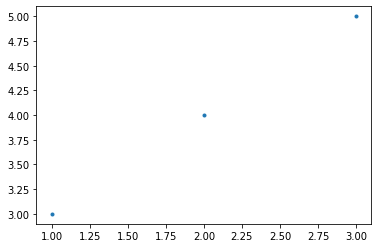

In [225]:
plt.plot([1,2,3],[3,4,5],'.')

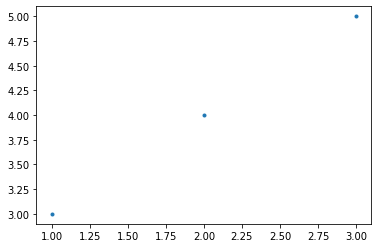

In [226]:
plt.plot(np.array([1,2,3]),np.array([3,4,5]),'.')

`-` 예제들 

In [228]:
t=np.linspace(-6,6,100)
x=np.sin(t)
y=np.cos(t)

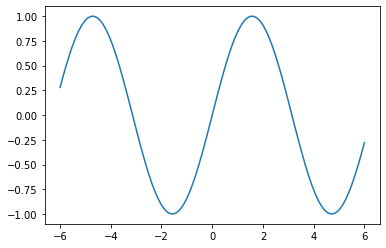

In [229]:
plt.plot(t,x) 

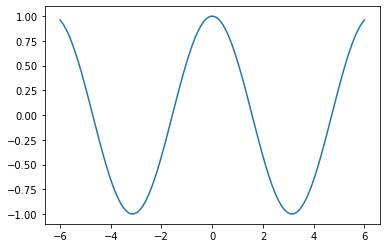

In [230]:
plt.plot(t,y) 

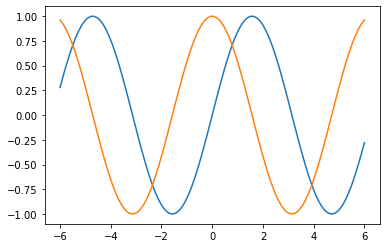

In [232]:
plt.plot(t,x) 
plt.plot(t,y)

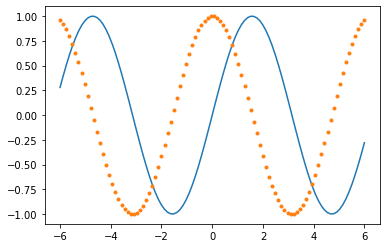

In [233]:
plt.plot(t,x) 
plt.plot(t,y,'.')

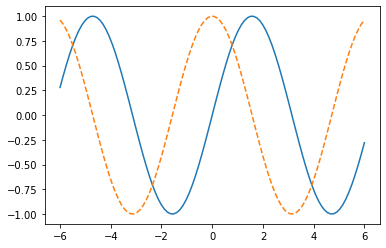

In [234]:
plt.plot(t,x) 
plt.plot(t,y,'--')

#### plt.hist

In [239]:
X = np.random.randn(1000) 
Y = np.random.rand(1000) 

(array([ 23.,  59., 134., 195., 233., 180., 111.,  45.,  14.,   6.]),
 array([-2.50630325, -1.93388828, -1.3614733 , -0.78905833, -0.21664336,
         0.35577162,  0.92818659,  1.50060157,  2.07301654,  2.64543152,
         3.21784649]),
 <BarContainer object of 10 artists>)

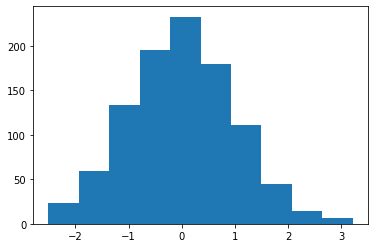

In [238]:
plt.hist(X)

(array([107.,  95.,  79., 104., 117., 106., 101., 110.,  91.,  90.]),
 array([0.00168942, 0.10132944, 0.20096946, 0.30060948, 0.4002495 ,
        0.49988951, 0.59952953, 0.69916955, 0.79880957, 0.89844958,
        0.9980896 ]),
 <BarContainer object of 10 artists>)

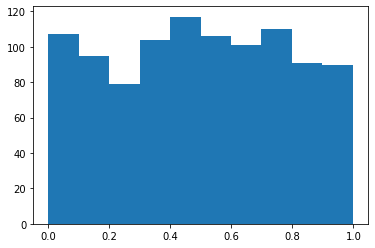

In [240]:
plt.hist(Y)